In [49]:
import numpy as np
import math
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as unp
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# import FIB data and calculate dose

In [50]:
data = pd.read_csv('Dose.csv')
data

,E,C,CE,Pass,D,DE,DT
0,1,0.0013,0.000013,1,5.0,0.5,2.500000e-08
1,2,0.0013,0.000013,1,5.0,0.5,5.000000e-08
2,3,0.0013,0.000013,1,5.0,0.5,1.000000e-07
3,4,0.0013,0.000013,1,5.0,0.5,2.500000e-07
4,5,0.0013,0.000013,1,5.0,0.5,5.000000e-07
5,6,0.0013,0.000013,1,5.0,0.5,1.000000e-06
6,7,0.0077,0.000077,1,8.0,0.5,1.000000e-06
7,8,0.0240,0.000240,1,10.5,0.5,1.000000e-06
8,9,0.0800,0.000800,1,14.0,2.0,1.000000e-06
9,10,0.4300,0.004300,1,30.0,2.0,1.000000e-06


In [51]:
#dwell has unit s
dwell = data['DT']

#current has unit nA
current = []
# current = unc.ufloat(data['Current'],data['CE'])   
for i in range(12):
    current.append(unc.ufloat(data['C'][i],  data['CE'][i])*1e-9)
overlap = 3
multip =  data['Pass']

#diameter has unit m
diameter = []
for i in range(12):
    diameter.append(unc.ufloat(data['D'][i],  data['DE'][i])*1e-9)
radius = []
for i in range(12):
    radius.append(diameter[i]/2)
ctoe = 6.242e18

#dose in  cm^-2
dose = []
for i in range(12):
    dose.append(current[i]*ctoe*dwell[i]*overlap*multip[i]/(math.pi*radius[i]**2)/(100)**2)


In [52]:
math.pi*data['D']**2/4

0       19.634954
1       19.634954
2       19.634954
3       19.634954
4       19.634954
5       19.634954
6       50.265482
7       86.590148
8      153.938040
9      706.858347
10    1134.114948
11    1134.114948
Name: D, dtype: float64

In [53]:
multip

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     2
11    10
Name: Pass, dtype: int64

In [54]:
for i in range(12):
    print('Region',i,': {:.2uP} nA'.format(current[i]))

Region 0 : (1.300±0.013)×10⁻¹² nA
Region 1 : (1.300±0.013)×10⁻¹² nA
Region 2 : (1.300±0.013)×10⁻¹² nA
Region 3 : (1.300±0.013)×10⁻¹² nA
Region 4 : (1.300±0.013)×10⁻¹² nA
Region 5 : (1.300±0.013)×10⁻¹² nA
Region 6 : (7.700±0.077)×10⁻¹² nA
Region 7 : (2.400±0.024)×10⁻¹¹ nA
Region 8 : (8.000±0.080)×10⁻¹¹ nA
Region 9 : (4.300±0.043)×10⁻¹⁰ nA
Region 10 : (7.900±0.079)×10⁻¹⁰ nA
Region 11 : (7.900±0.079)×10⁻¹⁰ nA


In [55]:
for i in range(12):
    print('Region',i,': {:.2uP} cm^-2'.format(dose[i]))

Region 0 : (3.10±0.62)×10¹² cm^-2
Region 1 : (6.2±1.2)×10¹² cm^-2
Region 2 : (1.24±0.25)×10¹³ cm^-2
Region 3 : (3.10±0.62)×10¹³ cm^-2
Region 4 : (6.2±1.2)×10¹³ cm^-2
Region 5 : (1.24±0.25)×10¹⁴ cm^-2
Region 6 : (2.87±0.36)×10¹⁴ cm^-2
Region 7 : (5.19±0.50)×10¹⁴ cm^-2
Region 8 : (9.7±2.8)×10¹⁴ cm^-2
Region 9 : (1.14±0.15)×10¹⁵ cm^-2
Region 10 : (2.61±0.28)×10¹⁵ cm^-2
Region 11 : (1.30±0.14)×10¹⁶ cm^-2


In [56]:
for i in range(12):
    print('Region',i,': {:.2uP} nm'.format(radius[i]*1e9))

Region 0 : 2.50±0.25 nm
Region 1 : 2.50±0.25 nm
Region 2 : 2.50±0.25 nm
Region 3 : 2.50±0.25 nm
Region 4 : 2.50±0.25 nm
Region 5 : 2.50±0.25 nm
Region 6 : 4.00±0.25 nm
Region 7 : 5.25±0.25 nm
Region 8 : 7.0±1.0 nm
Region 9 : 15.0±1.0 nm
Region 10 : 19.0±1.0 nm
Region 11 : 19.0±1.0 nm


In [57]:
dose_value = unp.nominal_values(dose)
dose_error = unp.std_devs(dose)
count = [1.2e4, 1.4e4, 1.6e4, 2.5e4, 2e4, 1.7e4]

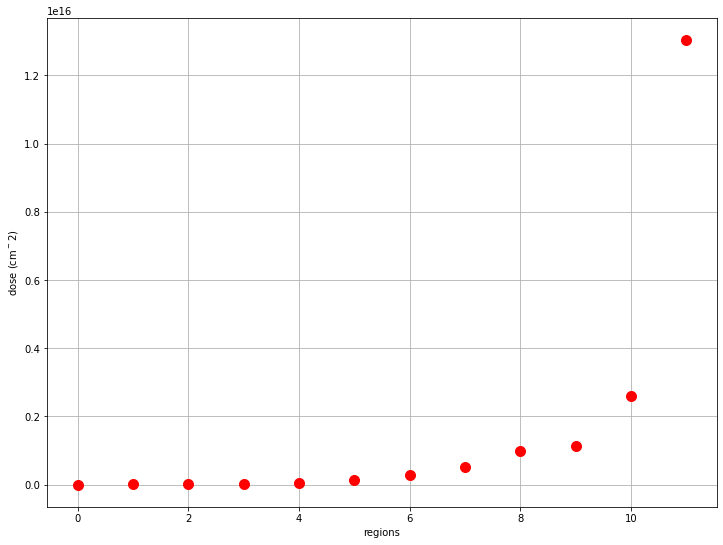

In [58]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'regions')
plt.ylabel(r'dose (cm$^-2$)')
plt.plot(dose_value,'.r', markersize = 20)

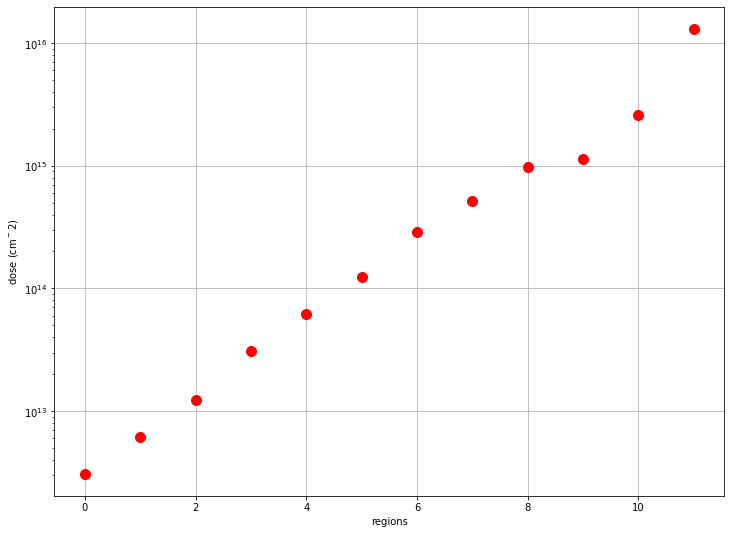

In [59]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'regions')
plt.ylabel(r'dose (cm$^-2$)')
plt.plot(dose_value,'.r', markersize = 20)
plt.yscale("log")

# import PL data and plot

In [60]:
el297 = pd.read_csv('el297.csv')
el298 = pd.read_csv('el298.csv')
calib = unc.ufloat(1.31e6, 8.97e4)
# calib = 1.31e6

In [61]:
el297

,region,PL,PLE
0,918,1.0000,1.000000
1,915,1.0000,1.000000
2,912,20096.0000,7337.661753
3,99,67842.0000,23221.059840
4,96,95446.0000,29799.049150
5,93,190525.0000,22594.302380
6,318,466442.8571,38532.880210
7,315,634440.0000,20712.146190
8,312,619125.0000,29338.527000
9,39,515640.0000,43988.782660


In [62]:
el297[2:12]

,region,PL,PLE
2,912,20096.0000,7337.661753
3,99,67842.0000,23221.059840
4,96,95446.0000,29799.049150
5,93,190525.0000,22594.302380
6,318,466442.8571,38532.880210
7,315,634440.0000,20712.146190
8,312,619125.0000,29338.527000
9,39,515640.0000,43988.782660
10,36,535900.0000,59236.897290
11,33,714857.1429,72805.078970


In [63]:
el298

,region,PL,PLE
0,918,1.0,1.0
1,915,1.0,1.0
2,912,1.0,1.0
3,99,1.0,1.0
4,96,1.0,1.0
5,93,1.0,1.0
6,318,2830000.0,163000.0
7,315,3060000.0,146000.0
8,312,3060000.0,87300.0
9,39,2920000.0,109000.0


In [64]:
el298[6:12]

,region,PL,PLE
6,318,2830000.0,163000.0
7,315,3060000.0,146000.0
8,312,3060000.0,87300.0
9,39,2920000.0,109000.0
10,36,3120000.0,71900.0
11,33,3910000.0,97200.0


In [65]:
pl97 = []
for i in range(12):
    pl97.append(unc.ufloat(el297['PL'][i], el297['PLE'][i])/calib)
pl97_value = unp.nominal_values(pl97)
pl97_error = unp.std_devs(pl97)
log_pl97 = []
# for i in range(2,12):
#     log_pl97.append(unp.log10(pl97[i]))
log_pl97 = unp.log10(pl97)
log_pl97_value = unp.nominal_values(log_pl97)
log_pl97_error = unp.std_devs(log_pl97)

In [66]:
pl98 = []
for i in range(12):
    pl98.append(unc.ufloat(el298['PL'][i], el298['PLE'][i])/calib)
pl98_value = unp.nominal_values(pl98)
pl98_error = unp.std_devs(pl98)
log_pl98 = []
# for i in range(6,12):
#     log_pl98.append(unp.log10(pl98[i]))
log_pl98 = unp.log10(pl98)
log_pl98_value = unp.nominal_values(log_pl98)
log_pl98_error = unp.std_devs(log_pl98)

In [67]:
log_dose = unp.log10(dose)
log_dose_value = unp.nominal_values(log_dose)
log_dose_error = unp.std_devs(log_dose)

In [68]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]

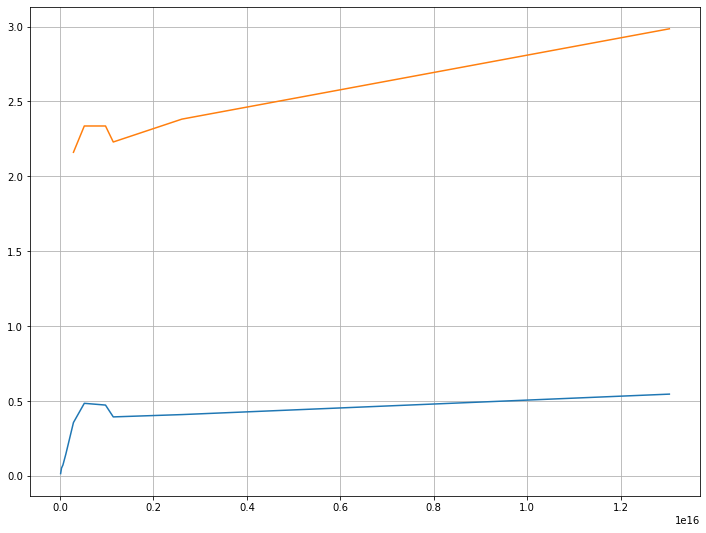

In [69]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(dose_value[2:12],pl97_value[2:12])
plt.plot(dose_value[6:12],pl98_value[6:12])
plt.show()

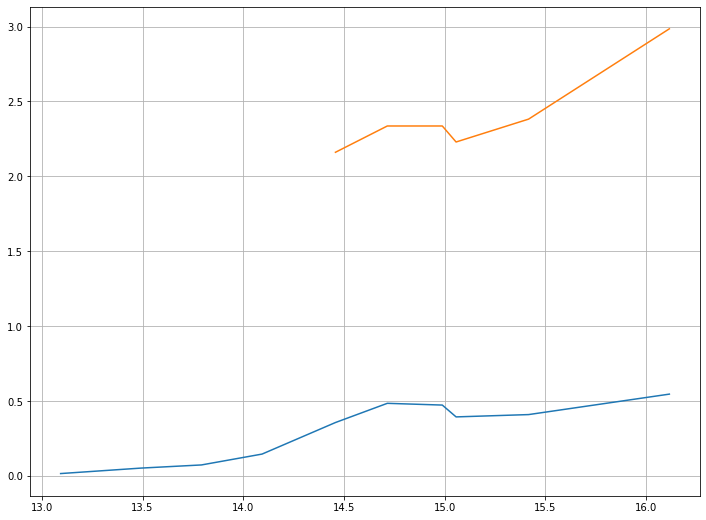

In [70]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(log_dose_value[2:12],pl97_value[2:12])
plt.plot(log_dose_value[6:12],pl98_value[6:12])
plt.show()

<ErrorbarContainer object of 3 artists>

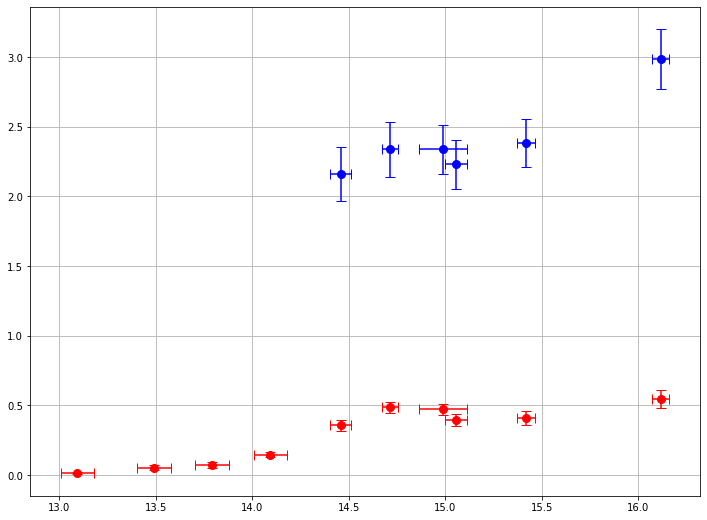

In [71]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(log_dose_value[2:12], pl97_value[2:12], xerr=log_dose_error[2:12], yerr=pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(log_dose_value[6:12], pl98_value[6:12], xerr=log_dose_error[6:12], yerr=pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

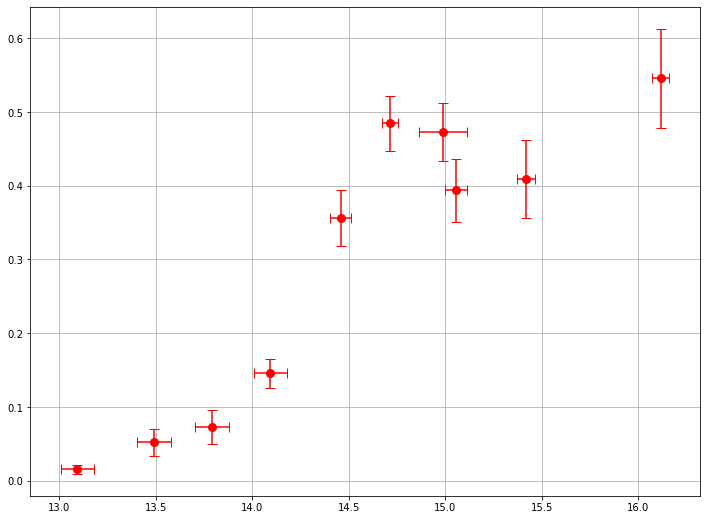

In [72]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(log_dose_value[2:12], pl97_value[2:12], xerr=log_dose_error[2:12], yerr=pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)


<ErrorbarContainer object of 3 artists>

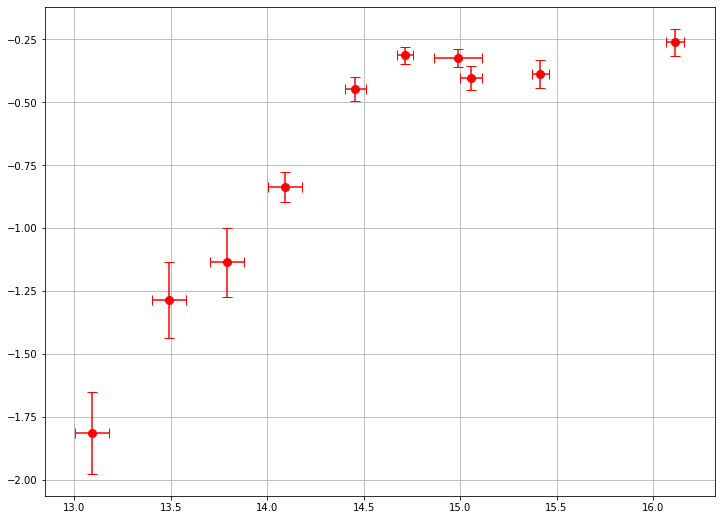

In [73]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(log_dose_value[2:12], log_pl97_value[2:12], xerr=log_dose_error[2:12], yerr=log_pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

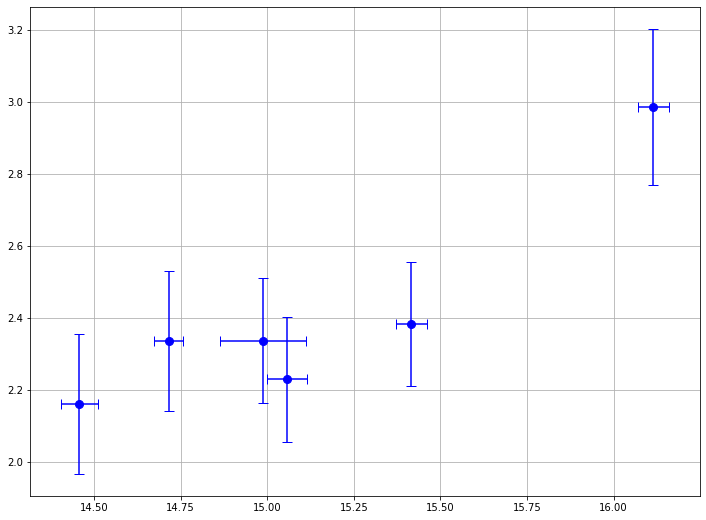

In [74]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(log_dose_value[6:12], pl98_value[6:12], xerr=log_dose_error[6:12], yerr=pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

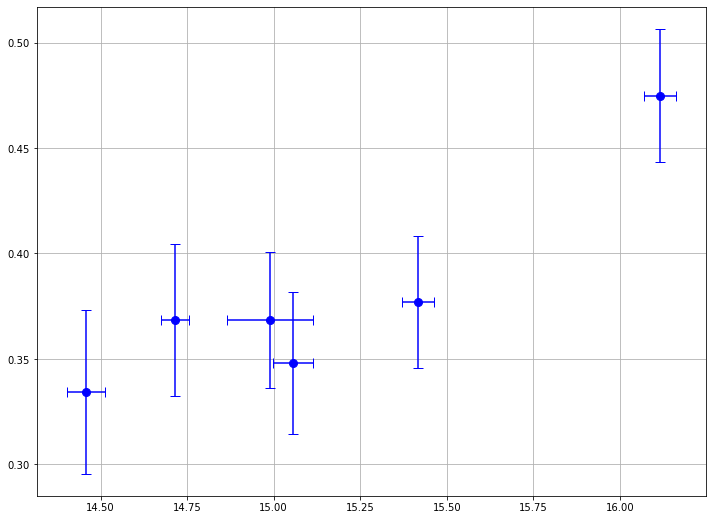

In [75]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(log_dose_value[6:12], log_pl98_value[6:12], xerr=log_dose_error[6:12], yerr=log_pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

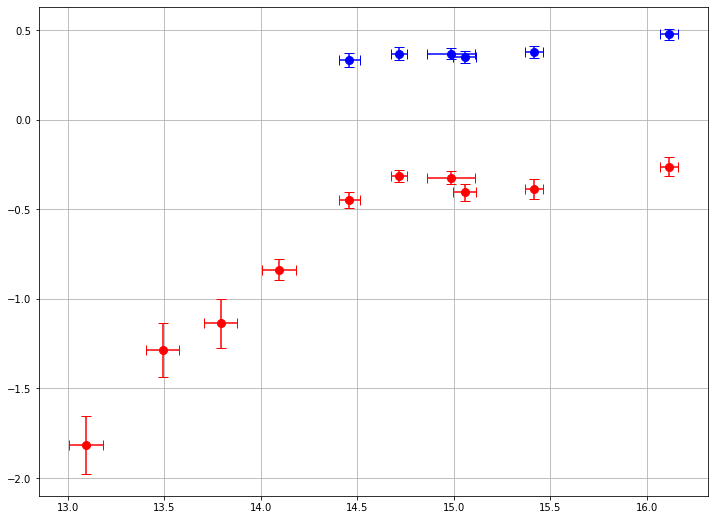

In [76]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
# plt.plot(log_dose_value[2:12], log_pl97_value[2:12],  color="r")
# plt.plot(log_dose_value[6:12], log_pl98_value[6:12],  color="b")
plt.errorbar(log_dose_value[2:12], log_pl97_value[2:12], xerr=log_dose_error[2:12], yerr=log_pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(log_dose_value[6:12], log_pl98_value[6:12], xerr=log_dose_error[6:12], yerr=log_pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

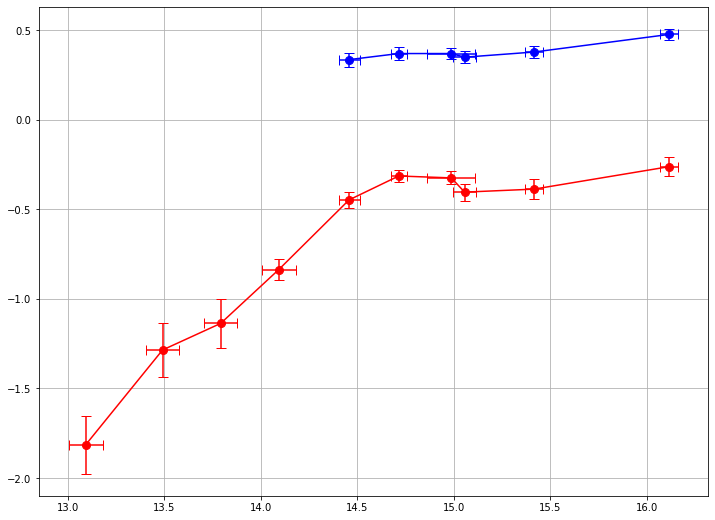

In [77]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(log_dose_value[2:12], log_pl97_value[2:12],  color="r")
plt.plot(log_dose_value[6:12], log_pl98_value[6:12],  color="b")
plt.errorbar(log_dose_value[2:12], log_pl97_value[2:12], xerr=log_dose_error[2:12], yerr=log_pl97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(log_dose_value[6:12], log_pl98_value[6:12], xerr=log_dose_error[6:12], yerr=log_pl98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

# yield calculation

In [78]:
y97 = []
for i in range(12):
    y97.append(pl97[i]/dose[i])
y97_value = unp.nominal_values(y97)
y97_error = unp.std_devs(y97)

In [79]:
y98 = []
for i in range(12):
    y98.append(pl98[i]/dose[i])
y98_value = unp.nominal_values(y98)
y98_error = unp.std_devs(y98)

In [80]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]

<ErrorbarContainer object of 3 artists>

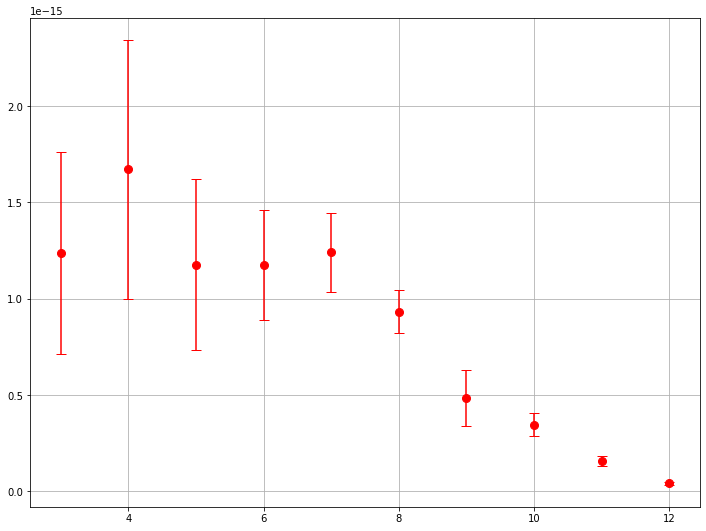

In [81]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(x[2:12],y97_value[2:12], yerr=y97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

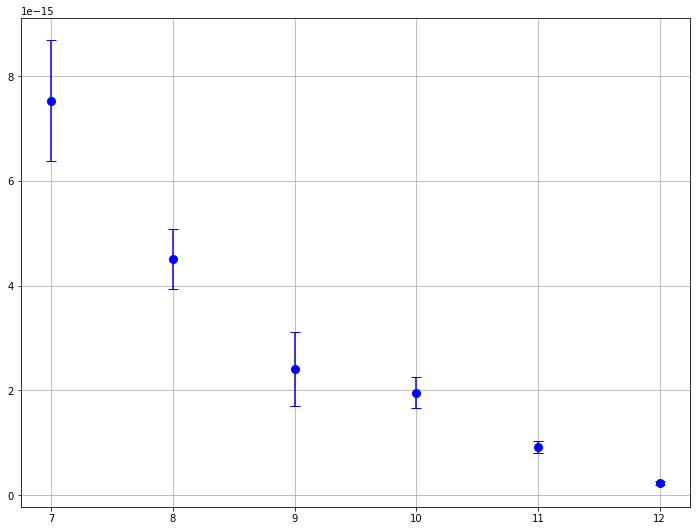

In [82]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.errorbar(x[6:12],y98_value[6:12], yerr=y98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

<ErrorbarContainer object of 3 artists>

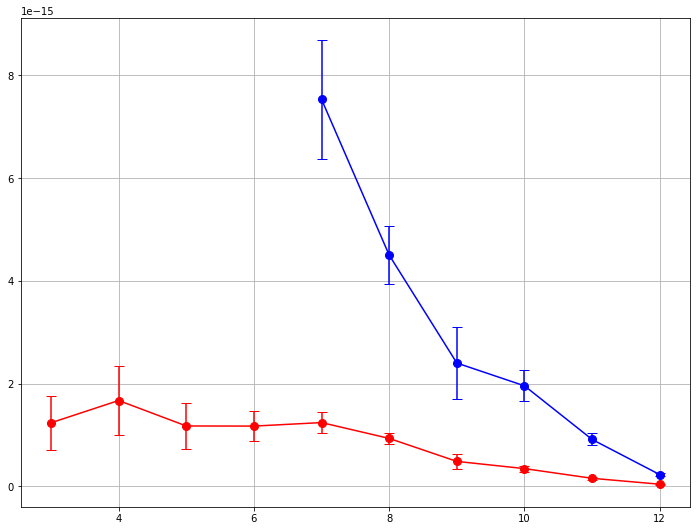

In [83]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(x[2:12],y97_value[2:12],  color="r")
plt.plot(x[6:12],y98_value[6:12],  color="b")
plt.errorbar(x[2:12],y97_value[2:12], yerr=y97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(x[6:12],y98_value[6:12], yerr=y98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

# final plots

<ErrorbarContainer object of 3 artists>

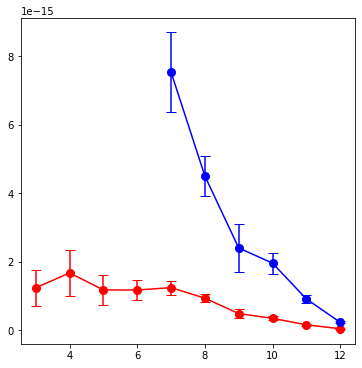

In [84]:
myfig = plt.figure(figsize=(6,6))
plt.plot(x[2:12],y97_value[2:12],  color="r")
plt.plot(x[6:12],y98_value[6:12],  color="b")
plt.errorbar(x[2:12],y97_value[2:12], yerr=y97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(x[6:12],y98_value[6:12], yerr=y98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)

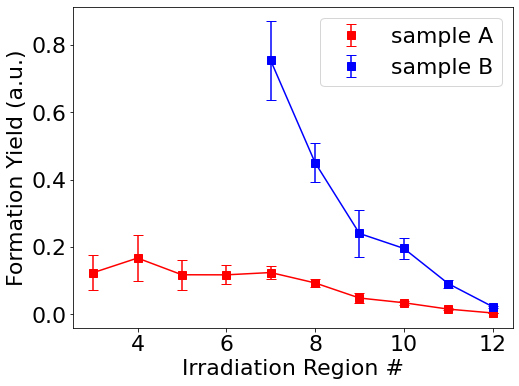

In [85]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 15*cm))
plt.plot(x[2:12],y97_value[2:12]*1e14,  color="r")
plt.plot(x[6:12],y98_value[6:12]*1e14,  color="b")
plt.errorbar(x[2:12],y97_value[2:12]*1e14, yerr=y97_error[2:12]*1e14, fmt="s", color="r", markersize=8, capsize=5,label='sample A')
plt.errorbar(x[6:12],y98_value[6:12]*1e14, yerr=y98_error[6:12]*1e14, fmt="s", color="b", markersize=8, capsize=5,label='sample B')
plt.xlabel('Irradiation Region #')
plt.ylabel('Formation Yield (a.u.)')
plt.legend()
fig.savefig('yield.svg', format= 'svg',transparent=True)

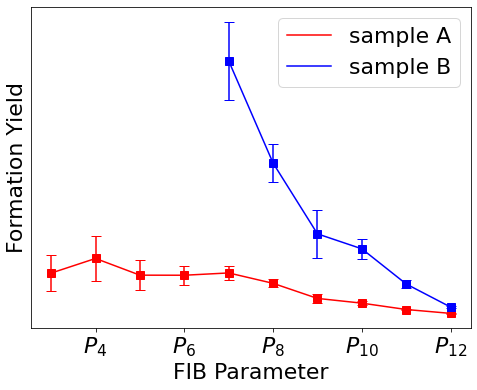

In [86]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 15*cm))
plt.plot(x[2:12],y97_value[2:12]*1e14,  color="r",label='sample A')
plt.plot(x[6:12],y98_value[6:12]*1e14,  color="b",label='sample B')
plt.errorbar(x[2:12],y97_value[2:12]*1e14, yerr=y97_error[2:12]*1e14, fmt="s", color="r", markersize=8, capsize=5)
plt.errorbar(x[6:12],y98_value[6:12]*1e14, yerr=y98_error[6:12]*1e14, fmt="s", color="b", markersize=8, capsize=5)
plt.xlabel('FIB Parameter')
plt.ylabel('Formation Yield')
plt.xticks([4,6,8,10,12], ('$P_4$','$P_6$','$P_8$','$P_{10}$','$P_{12}$'))
plt.yticks([])
plt.legend()
fig.savefig('yield_no_ticks.svg', format= 'svg',transparent=True)

<ErrorbarContainer object of 3 artists>

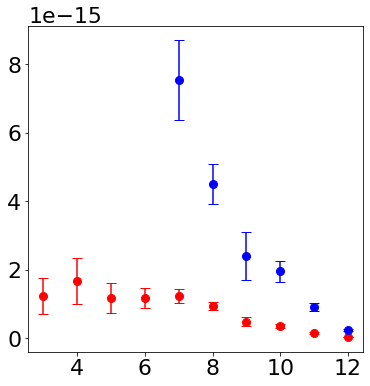

In [87]:
myfig = plt.figure(figsize=(6,6))
# plt.plot(x[2:12],y97_value[2:12],  color="r")
# plt.plot(x[6:12],y98_value[6:12],  color="b")
plt.errorbar(x[2:12],y97_value[2:12], yerr=y97_error[2:12], fmt="o", color="r", markersize=8, capsize=5)
plt.errorbar(x[6:12],y98_value[6:12], yerr=y98_error[6:12], fmt="o", color="b", markersize=8, capsize=5)


<ErrorbarContainer object of 3 artists>

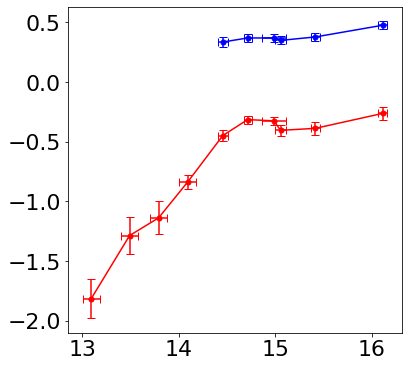

In [88]:
myfig = plt.figure(figsize=(6,6))
plt.plot(log_dose_value[2:12], log_pl97_value[2:12],  color="r")
plt.plot(log_dose_value[6:12], log_pl98_value[6:12],  color="b")
plt.errorbar(log_dose_value[2:12], log_pl97_value[2:12], xerr=log_dose_error[2:12], yerr=log_pl97_error[2:12], fmt="o", color="r", markersize=5, capsize=4)
plt.errorbar(log_dose_value[6:12], log_pl98_value[6:12], xerr=log_dose_error[6:12], yerr=log_pl98_error[6:12], fmt="o", color="b", markersize=5, capsize=4)

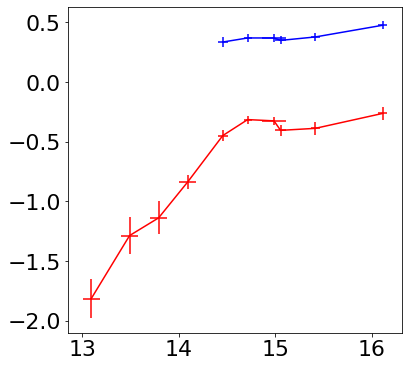

In [89]:
myfig = plt.figure(figsize=(6,6))
plt.errorbar(log_dose_value[2:12], log_pl97_value[2:12], xerr=log_dose_error[2:12], yerr=log_pl97_error[2:12], fmt="none", color="r", markersize=5, capsize=0)
plt.errorbar(log_dose_value[6:12], log_pl98_value[6:12], xerr=log_dose_error[6:12], yerr=log_pl98_error[6:12], fmt="none", color="b", markersize=5, capsize=0)
plt.plot(log_dose_value[2:12], log_pl97_value[2:12],  color="r")
plt.plot(log_dose_value[6:12], log_pl98_value[6:12],  color="b")

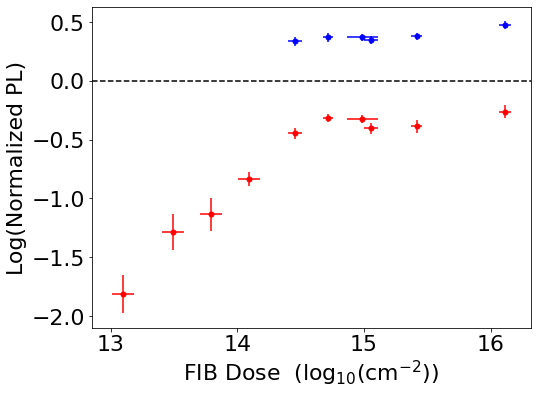

In [90]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54
fig = plt.figure(figsize=(20*cm, 15*cm))
plt.axhline(y=0, color='k', linestyle='dashed')
plt.errorbar(log_dose_value[2:12], log_pl97_value[2:12], xerr=log_dose_error[2:12], yerr=log_pl97_error[2:12], fmt="o", color="r", markersize=5, capsize=0)
plt.errorbar(log_dose_value[6:12], log_pl98_value[6:12], xerr=log_dose_error[6:12], yerr=log_pl98_error[6:12], fmt="o", color="b", markersize=5, capsize=0)
plt.xlabel('FIB Dose  ($\log_{10}($cm$^{-2})$)')
plt.ylabel('Log(Normalized PL)')
fig.savefig('PL.svg', format= 'svg',transparent=True)


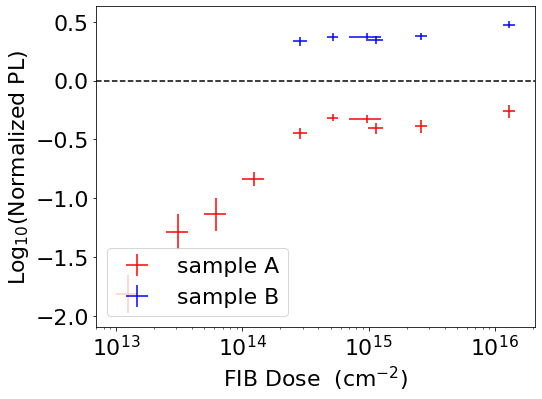

In [91]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 15*cm))
plt.axhline(y=0, color='k', linestyle='dashed')
plt.errorbar(dose_value[2:12], log_pl97_value[2:12], xerr=dose_error[2:12], yerr=log_pl97_error[2:12], fmt="none", color="r", markersize=5, capsize=0,label='sample A')
plt.errorbar(dose_value[6:12], log_pl98_value[6:12], xerr=dose_error[6:12], yerr=log_pl98_error[6:12], fmt="none", color="b", markersize=5, capsize=0,label='sample B')
plt.xlabel('FIB Dose  (cm$^{-2})$')
plt.ylabel('Log$_{10}$(Normalized PL)')
plt.xscale('log')
plt.legend()
fig.savefig('PL_log_x.svg', format= 'svg',transparent=True)

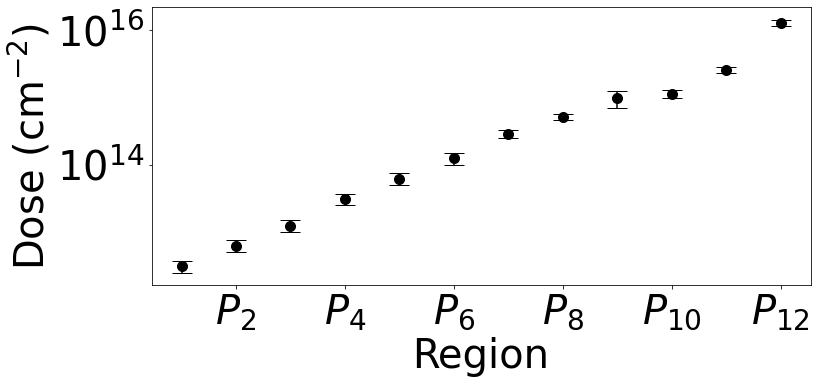

In [92]:
cm = 1/2.54 
plt.rcParams.update({'font.size': 40})
fig = plt.figure(figsize=(30*cm, 13*cm))
# plt.grid()
plt.xlabel(r'Region')
plt.ylabel(r'Dose (cm$^{-2}$)')
plt.errorbar(x ,dose_value, yerr=dose_error, fmt="o", color="k", markersize=10, capsize=10)
plt.xticks([2,4,6,8,10,12], ('$P_2$','$P_4$','$P_6$','$P_8$','$P_{10}$','$P_{12}$'))
# plt.yticks(('$P_2$','$P_4$','$P_6$','$P_8$','$P_10$','$P_{12}$'))
plt.yticks([1e12,1e13,1e14,1e15,1e16], ('$10^{12}$','$10^{13}$','$10^{14}$','$10^{15}$','$10^{16}$'))
plt.yscale("log")
fig.savefig('dose_log.svg', format= 'svg',transparent=True, dpi = 300)

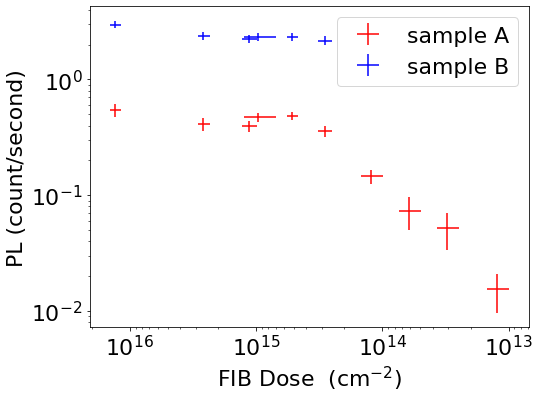

In [96]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 15*cm))
# plt.axhline(y=0, color='k', linestyle='dashed')
plt.errorbar(dose_value[2:12], pl97_value[2:12], xerr=dose_error[2:12], yerr=pl97_error[2:12], fmt="none", color="r", markersize=5, capsize=0,label='sample A')
plt.errorbar(dose_value[6:12], pl98_value[6:12], xerr=dose_error[6:12], yerr=pl98_error[6:12], fmt="none", color="b", markersize=5, capsize=0,label='sample B')
plt.xlabel('FIB Dose  (cm$^{-2})$')
plt.ylabel('PL (count/second)')
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.legend()
# fig.savefig('PL_log_x_new.svg', format= 'svg',transparent=True)